# **Finger Counting**

Parmaklar ile ifade edilen rakamlar görüntü işleme yöntemi kullanılarak tahmin edilmeye çalışılacaktır.

Elde bulunan eklemler numaralandırılmıştır.

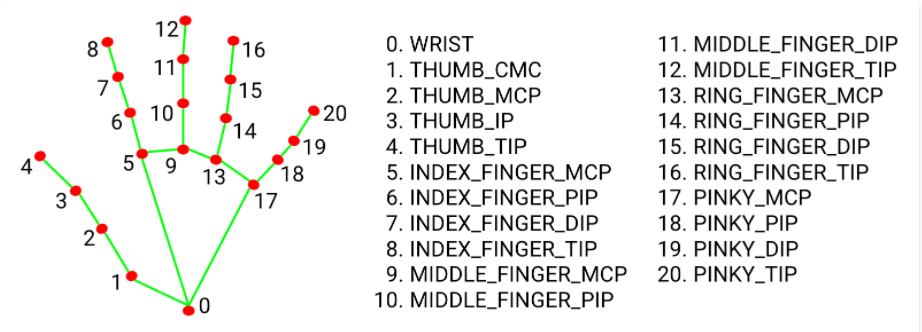

Eklemlerin numaraları kullanılarak hangi sayının gösterildiği bulunmaya çalışılacaktır.

Kapalı parmakları bulmak için şu şekilde bir yol izlenecektir:

Her bir parmağın en üstü, iki altındaki eklemden daha küçükse parmak kapalı durumdadır.

Örneğin 8, 6'nın altına geliyorsa bu parmak kapalı anlamına gelir.

Bunu anlamak için koordinatlarına bakılacaktır.

In [ ]:
import cv2
import mediapipe as mp

In [ ]:
#video capture
capture = cv2.VideoCapture(0)

VideoCapture methodunun içerisinde yer alan parametre dahili ya da harici kameraları belirlemek için kullanılır.

Bilgisayarın kamerasını kullanmak için 0, harici kamerayı kullanmak için 1 kullanılır.

In [ ]:
capture.set(3, 640)
capture.set(4, 480)

True

Videonun boyutları belirlenmiştir.

Bunun sebebi kodun çalıştırıldığı bilgisayar değiştirildiğinde aynı ekrana bakılacaktır.

In [ ]:
media_pipe_Hand = mp.solutions.hands

media pipe kütüphanesinin solution modülünden el objesi alınır.

In [ ]:
hands = media_pipe_Hand.Hands(max_num_hands = 1)

max_num_hands parametresi algoritmanın hızını etkiler.

Çünkü tespit edilecek el sayısı arttıkça algoritmanın hızı yavaşlar.

In [ ]:
media_pipe_draw = mp.solutions.drawing_utils

media pipe kütüphanesinin çizim altyapısı media_pipe_draw değişkenine aktarılır.

El üzerinden bulunan iskelet yapısı, kırmızı-beyaz görünümün oluşması sağlanır.

In [ ]:
tip_Ids = [4, 8, 12, 16, 20]
#parmakların uç noktaları bir liste içerisinde depolanmıştır.
#uç noktaların iki eklem altını belirlemek için bir liste oluşturmaya gerek yoktur.
#uç noktalardan 2 çıkarıldığında bu noktalar elde edilecektir.

#video read
while True:
    ret,frame = capture.read()
    
    #converting bgr to rgb format
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    result = hands.process(imgRGB) #mediapipe'ta görüntü işlenir.
    #print(result.multi_hand_landmarks)
    #result, kamerada el göründüğünde, eklemlerin x,y,z koordinatlarını gösterir.
    
    landmark_list = []
    #her bir frame'de liste boş bir şekilde oluşturulup, içi landmark id, x, y koordinatları ile doldurulacaktır.
    #landmark_list'de bulunan eklemlerin konumları kullanılacaktır.
    
    if result.multi_hand_landmarks:
        
        for handLms in result.multi_hand_landmarks:
            media_pipe_draw.draw_landmarks(frame, handLms, media_pipe_Hand.HAND_CONNECTIONS) 
            #her bir frame'de elin her bir eklemi işaretlenir.
            #draw_landmarks parametresi ile iskelet yapısı çizdirilir.
            
            for id, lm in enumerate(handLms.landmark):
                #x,y,z koordinatları lm içerisine aktarılır.
                #x,y,z koordinatlarının hangi ekleme ait olduğu id içerisinde depolanır.
                #böylelikle id ve landmark birbirinden ayrılır.
                
                height, weight, color = frame.shape
                cx, cy = int(lm.x*weight), int(lm.y*height)
                
                landmark_list.append([id, cx, cy])
                #print(landmark_list)
                
                
                #işaret parmağının ucu (8)
                #if id == 8:
                #    cv2.circle(frame, (cx,cy), 9, (255,0,0), cv2.FILLED)
                    
                #işaret parmağının ucunun iki eklem altı (6)
                #if id == 6:
                #    cv2.circle(frame, (cx,cy), 9, (0,0,255), cv2.FILLED)
                #eğer 8 konum olarak 6'nın altına gelirse parmak kapalı konumdadır.
                
    if len(landmark_list) != 0: #eğer liste boş değilse işlem gerçekleştirilir.
        
        fingers = []
        
        #baş parmak kontrol edilir.
        if landmark_list [tip_Ids[0]][1] < landmark_list [tip_Ids[0] - 1][1]:
            fingers.append(1)
        else:
            fingers.append(0)
        
        #diğer 4 parmak kontrol edilir.
        for id in range(1,5): #range(1,5) -> 1,2,3,4 (baş parmak ayrılmıştır.)
            
            if landmark_list [tip_Ids[id]][2] < landmark_list [tip_Ids[id] - 2][2]:
                fingers.append(1)
            else:
                fingers.append(0)
        #print(fingers)
        #burada baş parmak büküldüğü halde iki eklem altına gelmediğinden listeye 1 olarak eklendiği anlaşılmıştır.
        #bunun için baş parmağın en ucu bir eklem altının sağındaysa kapalı olarak algılanacaktır.
        
        total_fingers = fingers.count(1)
        #print(total_fingers)
        #kaç tane parmağın açık olduğu yazdırılır.
        
        cv2.putText(frame, str(total_fingers), (30,125), cv2.FONT_HERSHEY_PLAIN, 10, (255,0,0), 8)
        #putText methoduyla kaç parmağın açık olduğu ekranın üzerine yazdırılır.
        #10 yazının boyutu, (255,0,0) rengi, 8 kalınlığıdır.       
    
    cv2.imshow("Finger Counting",frame)
            
    if cv2.waitKey(1) & 0xFF == ord("q"): break

capture.release()
cv2.destroyAllWindows()